# DAE solver

In this notebook, we show some examples of solving a DAE model. For the purposes of this example, we use the CasADi solver, but the syntax remains the same for other solvers

In [1]:
%pip install "pybamm[plot,cite]" -q    # install PyBaMM if it is not installed
import os

import matplotlib.pyplot as plt
import numpy as np

import pybamm

os.chdir(pybamm.__path__[0] + "/..")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.8/849.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.8 MB/s eta 0:00:00


## Integrating DAEs

In PyBaMM, a model is solved by calling a solver with solve. This sets up the model to be solved, and then calls the method `_integrate`, which is specific to each solver. We begin by setting up and discretising a model

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data_df = pd.read_csv("/content/drive/My Drive/data_matrix_df_incorrect_10_percent_2_degree_2.csv")
data_df_2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_matrix_df_incorrect_10_percent_2_degree_400points.csv")

# data_matrix_df_incorrect_10_percent_2_degree_400points.csv


Mounted at /content/drive


In [3]:
## True model simulation

In [4]:
import pybamm
import numpy as np

# Create a model
model = pybamm.BaseModel()

# -------------------------------------------------------------------
# 1) Define variables (differential + algebraic)
# -------------------------------------------------------------------
A = pybamm.Variable("A")
E1 = pybamm.Variable("E1")
AE1 = pybamm.Variable("AE1")
B = pybamm.Variable("B")

k_1 = 1
k_2 = 0.5
k_3 = 5
# Time variable
t = pybamm.t
# -------------------------------------------------------------------
# 2) Define your ODEs
# Replace these with your actual reaction network equations
# -------------------------------------------------------------------
# f1 = 3.42*AE1 -4.74*AE1**2 + 1.32*A -.212
# f1 = -k_1*A*E1 + k_2*AE1
# f1 = k_3*AE1
# f2 = -f1

f1 = 5.050288531852 * AE1
f2 = -4.9187148552 * AE1


model.rhs[A] = f2
model.rhs[B] = f1

# -------------------------------------------------------------------
# 3) Define algebraic equations
# Replace these with the actual constraints of your system
# -------------------------------------------------------------------
g1 = E1 + 0.999450042023009*AE1 - 1.9997247096
g2 = -0.49987595817421*A*AE1 + A -2.73533420284*AE1
model.algebraic[E1] = g1
model.algebraic[AE1] = g2
# -------------------------------------------------------------------
# 4) Define initial conditions (only for differential variables)
# -------------------------------------------------------------------
model.initial_conditions = {
    A: data_df.iloc[0]['A'],
    B: data_df.iloc[0]['B'],
}

# For algebraic vars, supply an initial guess
model.initial_conditions.update({
    E1: data_df.iloc[0]['E1'],
    AE1: data_df.iloc[0]['AE1'],
})

model.variables = {"A": A, "E1": E1, "AE1": AE1, "B": B}

# Discretise using default discretisation
disc = pybamm.Discretisation()
disc.process_model(model);
# -------------------------------------------------------------------
# 5) Define any model parameters
# -------------------------------------------------------------------
# model.parameters = {}

# -------------------------------------------------------------------
# 6) Solve the model with DAE solver
# -------------------------------------------------------------------
solver = pybamm.IDAKLUSolver(rtol=1e-8, atol=1e-8)

t_eval = np.linspace(0, 4, 200)

solution_1 = solver.solve(model, t_eval)

# -------------------------------------------------------------------
# 7) Extract and plot
# -------------------------------------------------------------------
# import matplotlib.pyplot as plt

# plt.plot(t_eval, solution[S](t_eval), label="S (ODE)")
# plt.plot(t_eval, solution[P](t_eval), label="P (ODE)")
# plt.plot(t_eval, solution[E](t_eval), label="E (alg)")
# plt.plot(t_eval, solution[ES](t_eval), label="ES (alg)")
# plt.legend()
# plt.xlabel("time")
# plt.ylabel("variables")
# plt.show()
# Extract u and v
t_sol = solution_1.t
A_1 = solution_1["A"]
E1_1 = solution_1["E1"]
AE1_1 = solution_1["AE1"]
B_1 = solution_1["B"]


In [5]:
t_sol

array([0.00000000e+00, 2.05055542e-09, 4.10111084e-09, ...,
       3.99311641e+00, 3.99676245e+00, 4.00000000e+00])

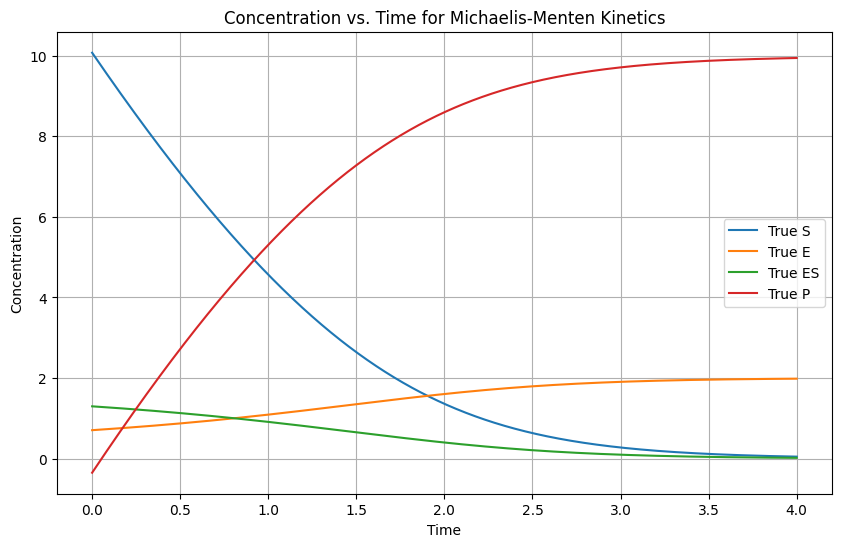

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# Create a single figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6)) # You can adjust the figure size

# Plot each species concentration against time
ax.plot(t_sol, A_1(t_sol), label='True S')
ax.plot(t_sol, E1_1(t_sol), label='True E')
ax.plot(t_sol, AE1_1(t_sol), label='True ES')
ax.plot(t_sol, B_1(t_sol), label='True P')

# Add labels and a title
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.set_title('Concentration vs. Time for Michaelis-Menten Kinetics')

# Add a legend to identify the lines
ax.legend()

# Add a grid for better readability
ax.grid(True)

# Display the plot
plt.show()

## Incorrectly discovered DAE 1 simulation

In [7]:
import pybamm
import numpy as np

# Create a model
model = pybamm.BaseModel()

# -------------------------------------------------------------------
# 1) Define variables (differential + algebraic)
# -------------------------------------------------------------------
A = pybamm.Variable("A")
E1 = pybamm.Variable("E1")
AE1 = pybamm.Variable("AE1")
B = pybamm.Variable("B")

# k_1 = 1
# k_2 = 0.5
# k_3 = 5
# Time variable
t = pybamm.t
# -------------------------------------------------------------------
# 2) Define your ODEs
# Replace these with your actual reaction network equations
# -------------------------------------------------------------------
f1 = 5.4629476258402 * AE1 - 0.1213652049*B*AE1 - 0.1375050627935*AE1 + 0.13171878054578
# f2 = -4.9506 * AE1
f2 = -9.31294246864 * AE1 + 0.4528943767*B*AE1 -1.865026104848766*AE1**2 + 0.974416368839*A + 1.3036654012800604

# f1 = k_3*AE1
# f2 = -f1

model.rhs[A] = f2
model.rhs[B] = f1

# -------------------------------------------------------------------
# 3) Define algebraic equations
# Replace these with the actual constraints of your system
# -------------------------------------------------------------------
g1 = E1 + 0.9900765985304*AE1 - 1.9978759273
g2 = A*AE1 -0.6412027150927*A +3.492139216659171*AE1 - 4.36939246893*AE1**2 - 0.166310236370892

model.algebraic[E1] = g1
model.algebraic[AE1] = g2

# -------------------------------------------------------------------
# 4) Define initial conditions (only for differential variables)
# -------------------------------------------------------------------
model.initial_conditions = {
    A: data_df.iloc[0]['A'],
    B: data_df.iloc[0]['B'],
}

# For algebraic vars, supply an initial guess
model.initial_conditions.update({
    E1: data_df.iloc[0]['E1'],
    AE1: data_df.iloc[0]['AE1'],
})

model.variables = {"A": A, "E1": E1, "AE1": AE1, "B": B}

# Discretise using default discretisation
disc = pybamm.Discretisation()
disc.process_model(model);

solver = pybamm.IDAKLUSolver(rtol=1e-8, atol=1e-8)

t_eval = np.linspace(0, 4, 200)

solution_2 = solver.solve(model, t_eval)


t_sol = solution_2.t
A_2 = solution_2["A"]
E1_2 = solution_2["E1"]
AE1_2 = solution_2["AE1"]
B_2 = solution_2["B"]


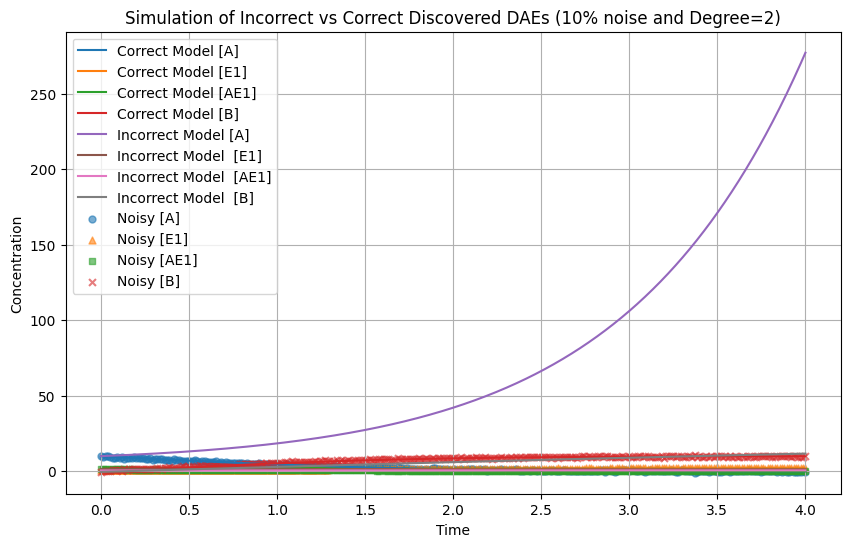

In [8]:
import matplotlib.pyplot as plt
import numpy as np


# Create a single figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6)) # You can adjust the figure size

# Plot each species concentration against time
# Plot each species concentration against time
ax.plot(t_sol, A_1(t_sol), label='Correct Model [A]')
ax.plot(t_sol, E1_1(t_sol), label='Correct Model [E1]')
ax.plot(t_sol, AE1_1(t_sol), label='Correct Model [AE1]')
ax.plot(t_sol, B_1(t_sol), label='Correct Model [B]')


# Plot each species concentration against time
ax.plot(t_sol, A_2(t_sol), label='Incorrect Model [A]')
ax.plot(t_sol, E1_2(t_sol), label='Incorrect Model  [E1]')
ax.plot(t_sol, AE1_2(t_sol), label='Incorrect Model  [AE1]')
ax.plot(t_sol, B_2(t_sol), label='Incorrect Model  [B]')


ax.scatter(data_df['t'], data_df['A'],
           label='Noisy [A]', marker='o', s=25, alpha=0.6)

ax.scatter(data_df['t'], data_df['E1'],
           label='Noisy [E1]', marker='^', s=25, alpha=0.6)

ax.scatter(data_df['t'], data_df['AE1'],
           label='Noisy [AE1]', marker='s', s=25, alpha=0.6)

ax.scatter(data_df['t'], data_df['B'],
           label='Noisy [B]', marker='x', s=25, alpha=0.6)

# Add labels and a title
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.set_title('Simulation of Incorrect vs Correct Discovered DAEs (10% noise and Degree=2)')

# Add a legend to identify the lines
ax.legend()

# Add a grid for better readability
ax.grid(True)

# Display the plot
plt.show()

## Incorrectly discovered DAE 2 simulation

---



---



In [9]:
import pybamm
import numpy as np

# Create a model
model = pybamm.BaseModel()

# -------------------------------------------------------------------
# 1) Define variables (differential + algebraic)
# -------------------------------------------------------------------
A = pybamm.Variable("A")
E1 = pybamm.Variable("E1")
AE1 = pybamm.Variable("AE1")
B = pybamm.Variable("B")

# k_1 = 1
# k_2 = 0.5
# k_3 = 5
# Time variable
t = pybamm.t
# -------------------------------------------------------------------
# 2) Define your ODEs
# Replace these with your actual reaction network equations
# -------------------------------------------------------------------
f1 = 4.990480305035 * AE1
# f2 = -4.9506 * AE1
f2 = -6.5774233220 * AE1 + 0.100973879280*B*AE1 + 0.305902126*A - 0.1792659926893796

# f1 = k_3*AE1
# f2 = -f1

model.rhs[A] = f2
model.rhs[B] = f1

# -------------------------------------------------------------------
# 3) Define algebraic equations
# Replace these with the actual constraints of your system
# -------------------------------------------------------------------
g1 = E1 + 0.9947816721057*AE1 - 1.997012149123
g2 = A*AE1 -0.70315162328*A +3.5942929343938*AE1 - 4.1292222700678*AE1**2 - 0.188330628650112

model.algebraic[E1] = g1
model.algebraic[AE1] = g2

# -------------------------------------------------------------------
# 4) Define initial conditions (only for differential variables)
# -------------------------------------------------------------------
model.initial_conditions = {
    A: data_df.iloc[0]['A'],
    B: data_df.iloc[0]['B'],
}

# For algebraic vars, supply an initial guess
model.initial_conditions.update({
    E1: data_df.iloc[0]['E1'],
    AE1: data_df.iloc[0]['AE1'],
})

model.variables = {"A": A, "E1": E1, "AE1": AE1, "B": B}

# Discretise using default discretisation
disc = pybamm.Discretisation()
disc.process_model(model);
# -------------------------------------------------------------------
# 5) Define any model parameters
# -------------------------------------------------------------------
# model.parameters = {}

# -------------------------------------------------------------------
# 6) Solve the model with DAE solver
# -------------------------------------------------------------------
solver = pybamm.IDAKLUSolver(rtol=1e-8, atol=1e-8)

t_eval = np.linspace(0, 4, 200)

solution_3 = solver.solve(model, t_eval)

# -------------------------------------------------------------------
# 7) Extract and plot
# -------------------------------------------------------------------
# import matplotlib.pyplot as plt

# plt.plot(t_eval, solution[S](t_eval), label="S (ODE)")
# plt.plot(t_eval, solution[P](t_eval), label="P (ODE)")
# plt.plot(t_eval, solution[E](t_eval), label="E (alg)")
# plt.plot(t_eval, solution[ES](t_eval), label="ES (alg)")
# plt.legend()
# plt.xlabel("time")
# plt.ylabel("variables")
# plt.show()
# Extract u and v
t_sol = solution_3.t
A_3 = solution_3["A"]
E1_3 = solution_3["E1"]
AE1_3 = solution_3["AE1"]
B_3 = solution_3["B"]


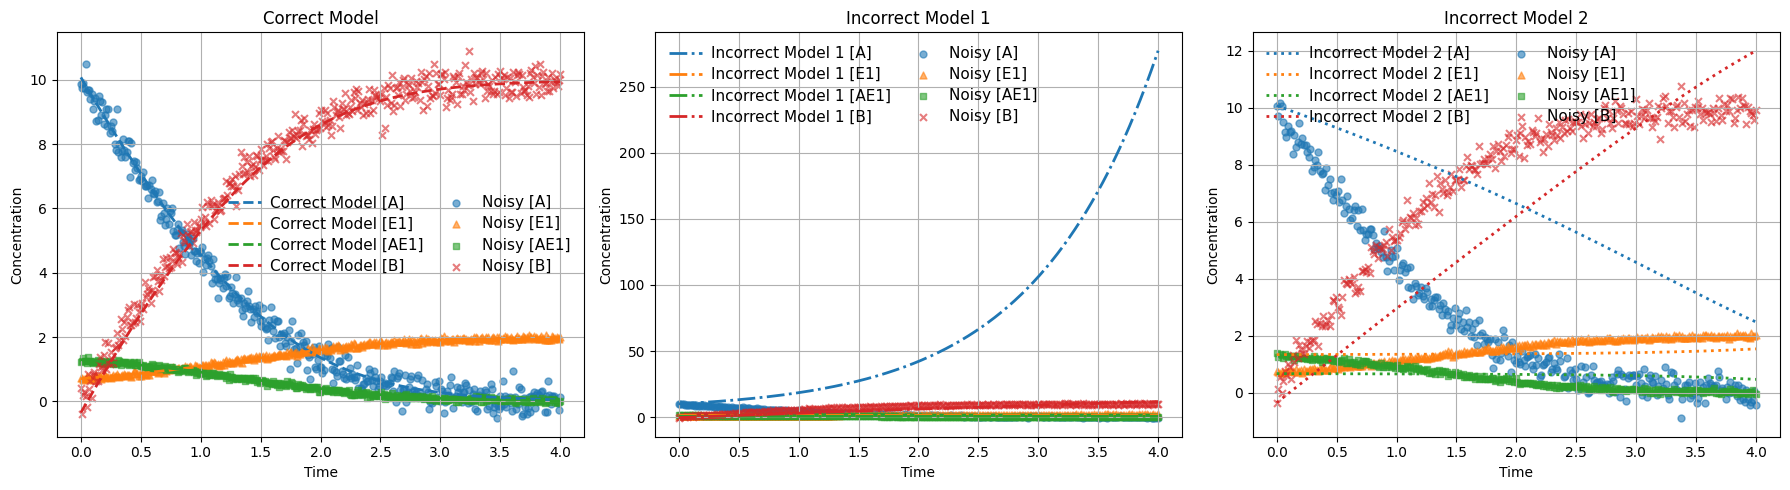

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- Styling ----------
species_colors = {"A": "C0", "E1": "C1", "AE1": "C2", "B": "C3"}

MODEL_STYLES = {
    "Correct Model": "--",
    "Incorrect Model 1": "-.",
    "Incorrect Model 2": ":",
}

noisy_markers = {"A": ("o", 25), "E1": ("^", 25), "AE1": ("s", 25), "B": ("x", 25)}

LEGEND_FONTSIZE = 11  # increased for visibility

def plot_model_vs_noisy(ax, title, model_name, funcs, data_df):
    ls = MODEL_STYLES[model_name]

    # Model lines (same colors, different line style by model)
    ax.plot(t_sol, funcs["A"](t_sol),   color=species_colors["A"],   ls=ls, lw=2, label=f'{model_name} [A]')
    ax.plot(t_sol, funcs["E1"](t_sol),  color=species_colors["E1"],  ls=ls, lw=2, label=f'{model_name} [E1]')
    ax.plot(t_sol, funcs["AE1"](t_sol), color=species_colors["AE1"], ls=ls, lw=2, label=f'{model_name} [AE1]')
    ax.plot(t_sol, funcs["B"](t_sol),   color=species_colors["B"],   ls=ls, lw=2, label=f'{model_name} [B]')

    # Noisy scatter (same colors/markers)
    for sp in ["A", "E1", "AE1", "B"]:
        m, s = noisy_markers[sp]
        ax.scatter(
            data_df["t"], data_df[sp],
            color=species_colors[sp],
            marker=m, s=s, alpha=0.6,
            label=f'Noisy [{sp}]'
        )

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Concentration")  # each subplot has its own y-axis label
    ax.grid(True)

    # Larger, still-compact legend
    ax.legend(
        fontsize=LEGEND_FONTSIZE,
        ncol=2,
        frameon=False,
        handlelength=2.2,
        handletextpad=0.6,
        columnspacing=1.0,
        labelspacing=0.4,
        loc="best"
    )


# ---------- 1x3 Figure (NO sharey, so each has its own scale) ----------
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

plot_model_vs_noisy(
    axes[0],
    title="Correct Model",
    model_name="Correct Model",
    funcs={"A": A_1, "E1": E1_1, "AE1": AE1_1, "B": B_1},
    data_df=data_df_2
)

plot_model_vs_noisy(
    axes[1],
    title="Incorrect Model 1",
    model_name="Incorrect Model 1",
    funcs={"A": A_2, "E1": E1_2, "AE1": AE1_2, "B": B_2},
    data_df=data_df
)

plot_model_vs_noisy(
    axes[2],
    title="Incorrect Model 2",
    model_name="Incorrect Model 2",
    funcs={"A": A_3, "E1": E1_3, "AE1": AE1_3, "B": B_3},
    data_df=data_df
)

plt.tight_layout()

plt.savefig(
    "model_comparison_1x3.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


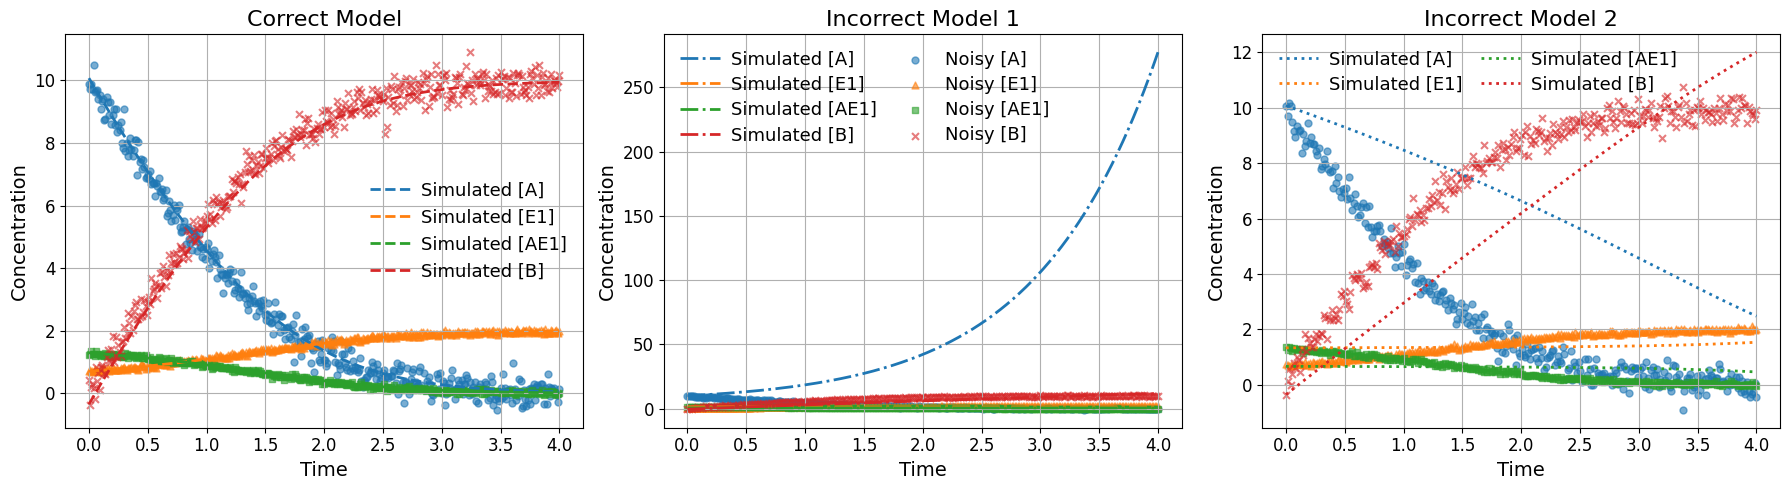

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- Styling ----------
species_colors = {"A": "C0", "E1": "C1", "AE1": "C2", "B": "C3"}

MODEL_STYLES = {
    "Correct Model": "--",
    "Incorrect Model 1": "-.",
    "Incorrect Model 2": ":",
}

noisy_markers = {
    "A": ("o", 25),
    "E1": ("^", 25),
    "AE1": ("s", 25),
    "B": ("x", 25),
}

# ---------- Font sizes ----------
TITLE_FONTSIZE  = 16
LABEL_FONTSIZE  = 14
TICK_FONTSIZE   = 12
LEGEND_FONTSIZE = 13


def plot_model_vs_noisy(
    ax, title, model_name, model_label, funcs, data_df,
    label_noisy=False, vertical_legend=False
):
    ls = MODEL_STYLES[model_name]

    # ---------- Model lines ----------
    ax.plot(t_sol, funcs["A"](t_sol),   color=species_colors["A"],   ls=ls, lw=2, label=f'{model_label} [A]')
    ax.plot(t_sol, funcs["E1"](t_sol),  color=species_colors["E1"],  ls=ls, lw=2, label=f'{model_label} [E1]')
    ax.plot(t_sol, funcs["AE1"](t_sol), color=species_colors["AE1"], ls=ls, lw=2, label=f'{model_label} [AE1]')
    ax.plot(t_sol, funcs["B"](t_sol),   color=species_colors["B"],   ls=ls, lw=2, label=f'{model_label} [B]')

    # ---------- Noisy scatter ----------
    for sp in ["A", "E1", "AE1", "B"]:
        m, s = noisy_markers[sp]
        ax.scatter(
            data_df["t"], data_df[sp],
            color=species_colors[sp],
            marker=m, s=s, alpha=0.6,
            label=f'Noisy [{sp}]' if label_noisy else None
        )

    # ---------- Labels & styling ----------
    ax.set_title(title, fontsize=TITLE_FONTSIZE)
    ax.set_xlabel("Time", fontsize=LABEL_FONTSIZE)
    ax.set_ylabel("Concentration", fontsize=LABEL_FONTSIZE)

    ax.tick_params(axis="both", labelsize=TICK_FONTSIZE)
    ax.grid(True)

    # ---------- Legend ----------
    if vertical_legend:
        ax.legend(
            fontsize=LEGEND_FONTSIZE,
            ncol=1,              # vertical list
            frameon=False,
            handlelength=2.2,
            handletextpad=0.6,
            labelspacing=0.5,
            loc="center right"   # inside, right side
        )
    else:
        ax.legend(
            fontsize=LEGEND_FONTSIZE,
            ncol=2,
            frameon=False,
            handlelength=2.2,
            handletextpad=0.6,
            columnspacing=1.0,
            labelspacing=0.4,
            loc="best"
        )


# ---------- 1x3 Figure ----------
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

plot_model_vs_noisy(
    axes[0],
    title="Correct Model",
    model_name="Correct Model",
    model_label="Simulated",
    funcs={"A": A_1, "E1": E1_1, "AE1": AE1_1, "B": B_1},
    data_df=data_df_2,
    label_noisy=False,
    vertical_legend=True   # ✅ vertical, inside right
)

plot_model_vs_noisy(
    axes[1],
    title="Incorrect Model 1",
    model_name="Incorrect Model 1",
    model_label="Simulated",
    funcs={"A": A_2, "E1": E1_2, "AE1": AE1_2, "B": B_2},
    data_df=data_df,
    label_noisy=True
)

plot_model_vs_noisy(
    axes[2],
    title="Incorrect Model 2",
    model_name="Incorrect Model 2",
    model_label="Simulated",
    funcs={"A": A_3, "E1": E1_3, "AE1": AE1_3, "B": B_3},
    data_df=data_df,
    label_noisy=False
)

plt.tight_layout()

plt.savefig(
    "model_comparison_1x3.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [18]:
from google.colab import files
files.download("model_comparison_1x3.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>